In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown --id 1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-

Downloading...
From: https://drive.google.com/uc?id=1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-
To: /content/bank-test-case-ds.csv
100% 4.35M/4.35M [00:00<00:00, 41.8MB/s]


In [3]:
df = pd.read_csv('/content/bank-test-case-ds.csv',sep=';')

In [4]:
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


Задание
Вам предлагается набор данных, содержащий следующие переменные
Переменные, характеризующие кредитную историю клиента
closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым
кредитам  
closed_creds - количество закрытых кредитов  
active_cred_sum_overdue - суммарная задолженность по активным кредитам  
active_cred_sum - сумма всех активных кредитов  
active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам  
active_cred_max_overdue - максимальная сумма просроченной задолженности по
активным кредитам  
Переменные характеризующие клиента  
age - возраст  
gender - пол  
region - регион  
month_income - ежемесячный доход  
Переменные, характеризующие кредит, по которому нужно сделать
прогноз  
first_loan - сумма, которую клиент хочет получить в кредит (из заявки)  
first_days_quant - срок, на которую клиент хочет взять кредит  
loan_cost_all - одобренная клиенту сумма кредита  
order_date - дата подачи заявки на получение кредита  
cost_all - сумма всех выплат по одобренному кредиту  
order_id - id заявки  
client_id - id клиента  
Целевая переменная:  
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)  
Необходимо на основе предоставленных данных построить модель для предсказания
целевой переменной. Сделать описание проделанных шагов
● Анализ данных
● Фильтрация
● Преобразование переменных
● Моделирование
● Оценка качества модели
Обоснование выбранной метрики качества.

In [5]:
df['expert']

0        1
1        1
2        1
3        1
4        1
        ..
49996    1
49997    1
49998    1
49999    1
50000    1
Name: expert, Length: 50001, dtype: int64

In [6]:
df['expert'].value_counts()

1    37464
0    12537
Name: expert, dtype: int64

In [7]:
df['expert'].value_counts(normalize=True)

1    0.749265
0    0.250735
Name: expert, dtype: float64

In [8]:
df['expert'].mean()

0.749265014699706

In [9]:
df.isna().mean()

closed_cred_sum            0.00000
closed_creds               0.00000
active_cred_sum_overdue    0.00000
active_cred_sum            0.00000
active_cred_day_overdue    0.00000
active_cred_max_overdue    0.00000
age                        0.00000
gender                     0.00000
region                     0.00000
first_loan                 0.00038
loan_cost_all              0.00000
first_days_quant           0.00000
month_income               0.00000
order_date                 0.00000
cost_all                   0.00000
order_id                   0.00000
client_id                  0.00000
expert                     0.00000
dtype: float64

In [10]:
df[['gender','region']] = df[['gender','region']].astype(str)

In [11]:
train = df.sample(frac=0.7,random_state=42).copy()

In [12]:
val = df[~df.index.isin(train.index)].copy()

In [13]:
len(train) + len(val)

50001

In [14]:
len(df)

50001

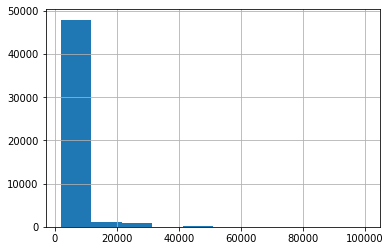

In [15]:
df['first_loan'].hist()

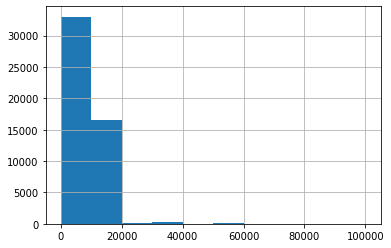

In [16]:
df['loan_cost_all'].hist()

In [17]:
df[['first_loan','loan_cost_all']].describe()

,first_loan,loan_cost_all
count,49982.000000,50001.000000
mean,7751.682606,6703.681926
std,5310.782009,4610.529844
min,2000.000000,0.000000
25%,5000.000000,3000.000000
50%,7000.000000,7000.000000
75%,10000.000000,10000.000000
max,100000.000000,100000.000000


In [18]:
! pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [19]:
from catboost import CatBoostClassifier

In [20]:
df.columns

Index(['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'gender', 'region', 'first_loan', 'loan_cost_all',
       'first_days_quant', 'month_income', 'order_date', 'cost_all',
       'order_id', 'client_id', 'expert'],
      dtype='object')

In [21]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [22]:
df['region'].value_counts()

0     20061
40     4185
36     1921
75     1778
65     1614
      ...  
48       19
85       17
43       16
21       11
9         7
Name: region, Length: 99, dtype: int64

In [23]:
df['order_date'].agg(['min','max'])

min    2017-06-26
max    2017-09-25
Name: order_date, dtype: object

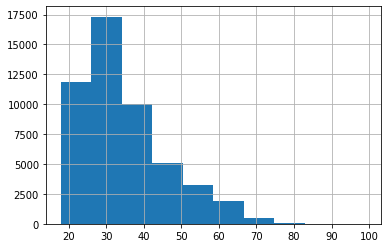

In [24]:
df['age'].hist()

In [25]:
df['age'].describe()

count    50001.000000
mean        35.018900
std         11.235206
min         18.000000
25%         27.000000
50%         32.000000
75%         41.000000
max         99.000000
Name: age, dtype: float64

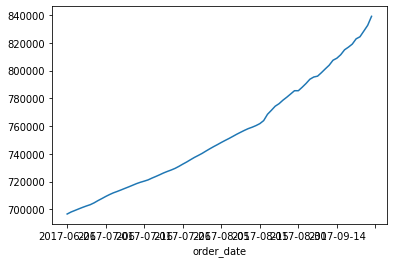

In [26]:
df.groupby('order_date')['order_id'].mean().plot()

In [27]:
X_col = ['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age',  'first_loan',
       'first_days_quant', 'month_income',
      'client_id',
       'gender', 'region',
       ]

cat_features = ['gender','region']
y_col = ['expert']

In [28]:
model = CatBoostClassifier(verbose=100,
                           random_state=42,
                           learning_rate=0.5,
                           early_stopping_rounds=200,
                           eval_metric='AUC',
                           cat_features=cat_features
                           )

In [29]:
model.fit(train[X_col],train[y_col],
          eval_set=(val[X_col],val[y_col]))

0:	test: 0.8703715	best: 0.8703715 (0)	total: 94.2ms	remaining: 1m 34s
100:	test: 0.9441178	best: 0.9441178 (100)	total: 3.88s	remaining: 34.6s
200:	test: 0.9459992	best: 0.9461400 (167)	total: 7.62s	remaining: 30.3s
300:	test: 0.9468176	best: 0.9469663 (265)	total: 11.3s	remaining: 26.3s
400:	test: 0.9476001	best: 0.9476765 (387)	total: 15s	remaining: 22.4s
500:	test: 0.9484574	best: 0.9486474 (495)	total: 18.7s	remaining: 18.6s
600:	test: 0.9485748	best: 0.9487407 (582)	total: 22.3s	remaining: 14.8s
700:	test: 0.9486368	best: 0.9487417 (633)	total: 26s	remaining: 11.1s
800:	test: 0.9492124	best: 0.9492575 (797)	total: 29.6s	remaining: 7.37s
900:	test: 0.9494020	best: 0.9494097 (898)	total: 33.3s	remaining: 3.66s
999:	test: 0.9496165	best: 0.9496848 (989)	total: 36.8s	remaining: 0us

bestTest = 0.9496847863
bestIteration = 989

Shrink model to first 990 iterations.


In [30]:
fi = pd.DataFrame({'w':model.feature_importances_,'name':X_col})

In [31]:
fi.sort_values('w',ascending=False)

,w,name
8,14.691746,first_days_quant
10,12.576234,client_id
9,10.023964,month_income
0,8.394945,closed_cred_sum
3,8.347118,active_cred_sum
6,7.329569,age
5,7.316254,active_cred_max_overdue
2,6.784682,active_cred_sum_overdue
7,6.083783,first_loan
1,6.057225,closed_creds


In [32]:
! pip install shap

     |████████████████████████████████| 371 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509235 sha256=21c825339a11329f6484a331c6e9c44dae15de3de116d1e207f05e2dcfdeb909
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [33]:
import shap

In [45]:
explainer = shap.Explainer(model)
shap_values = explainer(train[X_col])

shap.plots.waterfall(shap_values=[0])

AttributeError: ignored

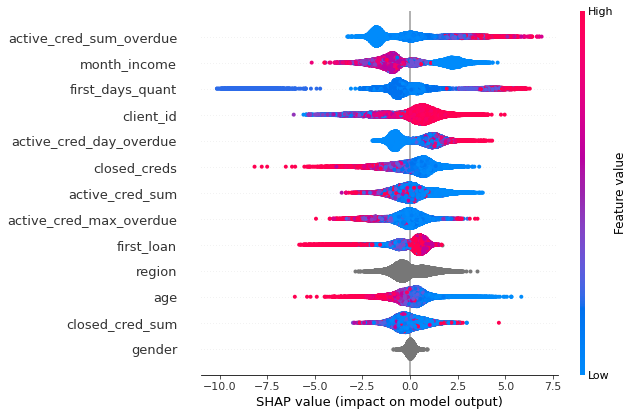

In [36]:
shap.summary_plot(shap_values, train[X_col])

In [38]:
df['income_cat'] = pd.qcut(df['month_income'],5,duplicates='drop')

In [39]:
df.groupby('income_cat')['expert'].agg(['mean','count'])

,mean,count
income_cat,,
"(-0.001, 20000.0]",0.863225,22972
"(20000.0, 35000.0]",0.684896,15817
"(35000.0, 50000.0]",0.601476,8401
"(50000.0, 550000.0]",0.621843,2811


In [40]:
df['client_cat'] = pd.qcut(df['client_id'],5,duplicates='drop')

In [41]:
df.groupby('client_cat')['expert'].agg(['mean','count'])

,mean,count
client_cat,,
"(108.999, 274066.0]",0.455954,10001
"(274066.0, 310588.0]",0.716700,10000
"(310588.0, 322138.0]",0.816000,10000
"(322138.0, 332110.0]",0.869500,10000
"(332110.0, 393528.0]",0.888200,10000


In [42]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,income_cat,client_cat
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1,"(-0.001, 20000.0]","(274066.0, 310588.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1,"(-0.001, 20000.0]","(108.999, 274066.0]"
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1,"(-0.001, 20000.0]","(332110.0, 393528.0]"
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1,"(20000.0, 35000.0]","(332110.0, 393528.0]"
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1,"(20000.0, 35000.0]","(332110.0, 393528.0]"


In [43]:
df['term_cat'] = pd.qcut(df['first_days_quant'],5)

In [44]:
df.groupby('term_cat')['expert'].agg(['mean','count'])

,mean,count
term_cat,,
"(-0.001, 10.0]",0.775424,12606
"(10.0, 14.0]",0.782866,7447
"(14.0, 20.0]",0.654801,19131
"(20.0, 21.0]",0.983274,3647
"(21.0, 336.0]",0.801395,7170


In [46]:
val['score'] = model.predict_proba(val[X_col])[:,1]

In [47]:
val

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,score
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1,0.999996
5,786916.0,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0,0.041321
9,0.0,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1,1.000000
10,0.0,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,15,30000.0,2017-07-23,0.0,728553,123851,1,0.999835
12,0.0,0,0.00,8000.00,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728476,320544,1,0.989989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,0.0,0,0.00,0.00,0,0.00,20,1,0,7000.0,7000,20,20000.0,2017-08-13,0.0,759492,338248,1,0.999966
49986,0.0,0,0.00,0.00,0,0.00,20,1,0,7000.0,7000,20,20000.0,2017-08-13,0.0,759492,338248,1,0.999966
49995,0.0,0,26758.57,25000.00,371,26758.57,44,1,42,3000.0,1000,23,50000.0,2017-08-13,1545.0,759462,338231,0,0.002401
49996,0.0,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1,0.999997


In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
roc_auc_score(val['expert'],val['score'])

0.9496847862832667

In [50]:
fpr, tpr, thr = roc_curve(val['expert'],val['score'])

In [52]:
roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thr':thr})

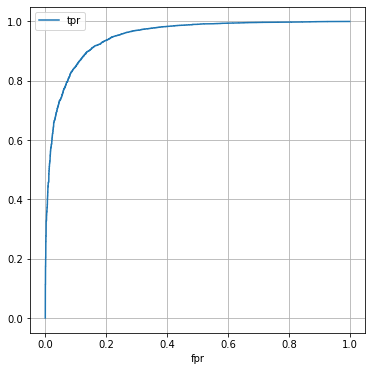

In [53]:
roc.plot(x='fpr',y='tpr',figsize=(6,6),grid=True)

In [54]:
roc['tpr-fpr'] = roc['tpr'] - roc['fpr']

In [56]:
roc.sort_values('tpr-fpr', ascending=False)

,fpr,tpr,thr,tpr-fpr
1769,0.136,0.897,0.811,0.761
1767,0.136,0.897,0.813,0.761
1771,0.136,0.897,0.811,0.761
1770,0.136,0.897,0.811,0.761
1768,0.136,0.897,0.812,0.761
...,...,...,...,...
3,0.000,0.001,1.000,0.001
2,0.000,0.001,1.000,0.001
1,0.000,0.000,1.000,0.000
0,0.000,0.000,2.000,0.000


In [57]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [58]:
best_thr = roc.sort_values('tpr-fpr',ascending=False)['thr'].iloc[0]

In [59]:
val['y_pred'] = (val['score'] >= best_thr)*1

In [60]:
val

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,score,y_pred
2,51356.000,2,3000.000,3000.000,8,3000.000,28,1,3,10000.000,10000,84,0.000,2017-07-23,0.000,728323,320467,1,1.000,1
5,786916.000,11,0.000,1063763.000,0,10395.390,47,0,38,10000.000,5500,14,50000.000,2017-07-23,0.000,728526,320564,0,0.041,0
9,0.000,0,21143.000,21143.000,1016,10924.000,28,1,0,10000.000,10000,90,0.000,2017-07-23,0.000,728454,123851,1,1.000,1
10,0.000,0,21143.000,21143.000,1016,10924.000,28,1,0,10000.000,10000,15,30000.000,2017-07-23,0.000,728553,123851,1,1.000,1
12,0.000,0,0.000,8000.000,0,0.000,24,1,80,7000.000,7000,10,35000.000,2017-07-23,0.000,728476,320544,1,0.990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,0.000,0,0.000,0.000,0,0.000,20,1,0,7000.000,7000,20,20000.000,2017-08-13,0.000,759492,338248,1,1.000,1
49986,0.000,0,0.000,0.000,0,0.000,20,1,0,7000.000,7000,20,20000.000,2017-08-13,0.000,759492,338248,1,1.000,1
49995,0.000,0,26758.570,25000.000,371,26758.570,44,1,42,3000.000,1000,23,50000.000,2017-08-13,1545.000,759462,338231,0,0.002,0
49996,0.000,0,74662.610,79662.610,2593,42204.550,27,1,0,4000.000,4000,20,0.000,2017-08-13,0.000,759472,96091,1,1.000,1


In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
print(classification_report(val['expert'],val['y_pred']))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      3835
           1       0.95      0.90      0.92     11165

    accuracy                           0.89     15000
   macro avg       0.85      0.88      0.86     15000
weighted avg       0.90      0.89      0.89     15000



In [63]:
confusion_matrix(val['expert'],val['y_pred'])

array([[ 3314,   521],
       [ 1151, 10014]])

In [64]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['y_pred']).ravel()

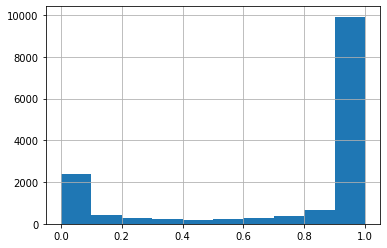

In [65]:
val['score'].hist()

In [66]:
fn

1151

In [67]:
fp

521

In [68]:
roc['thr'].unique()

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.19145042e-06, 3.11007941e-06, 2.26192465e-08])

In [69]:
thrs = [0] + list(np.sort(val['score'].unique()))

In [70]:
thr = thrs[123]

In [71]:
val['pred'] = (val['score'] > thr) * 1

In [72]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['pred']).ravel()

In [73]:
from tqdm.notebook import tqdm

In [74]:
res = []
for thr in tqdm(thrs):
  val['pred'] = (val['score'] > thr) * 1
  tn, fp, fn, tp = confusion_matrix(val['expert'],val['pred']).ravel()
  res.append((tn, fp, fn, tp ,thr))


  0%|          | 0/14255 [00:00<?, ?it/s]

In [75]:
'tn, fp, fn, tp ,thr'.split(',')

['tn', ' fp', ' fn', ' tp ', 'thr']

In [76]:
cf = pd.DataFrame(res, columns=['tn', 'fp', 'fn', 'tp','thr'])

In [77]:
cf

,tn,fp,fn,tp,thr
0,0,3835,0,11165,0.000
1,1,3834,0,11165,0.000
2,2,3833,0,11165,0.000
3,3,3832,0,11165,0.000
4,4,3831,0,11165,0.000
...,...,...,...,...,...
14250,3835,0,11161,4,1.000
14251,3835,0,11162,3,1.000
14252,3835,0,11163,2,1.000
14253,3835,0,11164,1,1.000


In [78]:
cf['profit'] = cf['tn'] - 5 * cf['fn'] - cf['fp']

In [79]:
cf['profit2'] = cf['tp'] + cf['tn'] - 5 * cf['fn'] - cf['fp']

In [80]:
cf['profit3'] = -5 * cf['fn'] - cf['fp']

In [81]:
cf.sort_values('profit',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2759,2586,1249,284,10881,0.219,-83,10798,-2669
2758,2585,1250,284,10881,0.219,-85,10796,-2670
2761,2587,1248,285,10880,0.220,-86,10794,-2673
2760,2586,1249,285,10880,0.219,-88,10792,-2674
2757,2583,1252,284,10881,0.219,-89,10792,-2672
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000,-51985,-51984,-55820


In [82]:
cf.sort_values('profit2',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2465,2356,1479,199,10966,0.132,-118,10848,-2474
2464,2355,1480,199,10966,0.132,-120,10846,-2475
2523,2403,1432,215,10950,0.147,-104,10846,-2507
2460,2352,1483,198,10967,0.131,-121,10846,-2473
2471,2360,1475,201,10964,0.134,-120,10844,-2480
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000,-51985,-51984,-55820


In [83]:
cf.sort_values('profit3',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2026,1973,1862,111,11054,0.058,-444,10610,-2417
2232,2158,1677,148,11017,0.090,-259,10758,-2417
2025,1972,1863,111,11054,0.058,-446,10608,-2418
2231,2157,1678,148,11017,0.089,-261,10756,-2418
2241,2167,1668,150,11015,0.091,-251,10764,-2418
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000,-51985,-51984,-55820


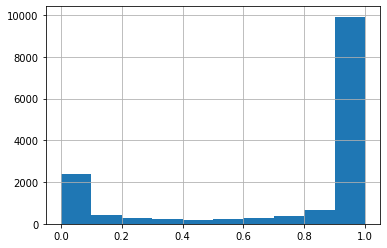

In [84]:
val['score'].hist()